# Question Q6

*Question*: When your organization develops an ML-enabled system, to what degree would you judge that the solutions are “sub-optimally” developed in terms of requiring rework and/or making maintenance over time harder than it could be?

*Answer Type*: Likert Option

*Options*: [Never, Rarely, Sometimes, Frequently, Always, I don't know]

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

In [3]:
# For PROFES, we discarded suspended submissions (e.g., remove those who didn't complete the survey).
dataframe_obj.df.drop(dataframe_obj.df[dataframe_obj.df['Status'] == 'Suspended (22)'].index, inplace = True)

### Basic Analysis

In [4]:
dataframe_obj.df['Q6_ML_Solution_Optimality'].head()

0    Frequently
1         Never
2     Sometimes
3     Sometimes
4     Sometimes
Name: Q6_ML_Solution_Optimality, dtype: object

In [5]:
# cleaning data
dataframe_obj.remove_value_from_df('-77','Q6_ML_Solution_Optimality')
dataframe_obj.remove_value_from_df("I don't know",'Q6_ML_Solution_Optimality') # I don't know option is not important

In [6]:
indexes = list(dataframe_obj.df['Q6_ML_Solution_Optimality'].value_counts().index)
values = list(dataframe_obj.df['Q6_ML_Solution_Optimality'].value_counts())

In [7]:
# format order to show on likert
order = [2, 3, 1, 0, 4]
indexes = [indexes[i] for i in order]
values = [values[i] for i in order]

In [8]:
# normalize values - ensuring that the sum don't overflow 100
sum_values = sum(values)
normalized_values = [(float(v)/sum_values)* 100 for v in values]

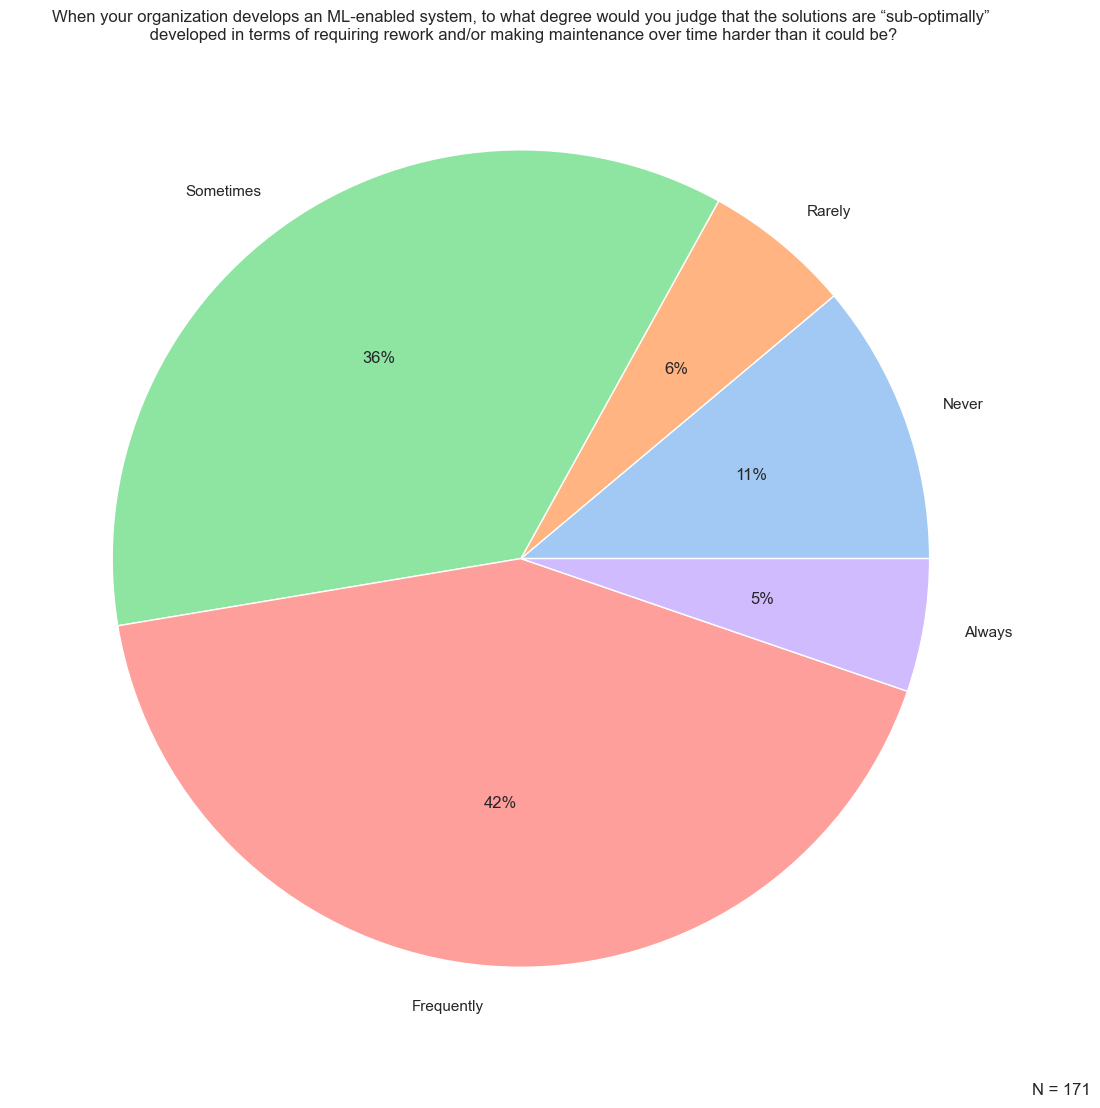

In [9]:
# piechart
q6_plot = PlotUtils(pd.DataFrame(
    data={'Optimality': indexes, 'Answers': normalized_values}
))

# compute total of answer considered in this question
total_answers = "N = " + str(len(dataframe_obj.df['Q6_ML_Solution_Optimality']))
total_answers_int = len(dataframe_obj.df['Q6_ML_Solution_Optimality'])

q6_plot.pie_chart(values_column="Answers", labels_column="Optimality", 
                  title="When your organization develops an ML-enabled system, to what degree would you judge that the solutions are “sub-optimally”\n developed in terms of requiring rework and/or making maintenance over time harder than it could be?",
                  total_answers=total_answers)

In [10]:
# likert
q6_plot = PlotUtils(pd.DataFrame(
    data={'Optimality': list(dataframe_obj.df['Q6_ML_Solution_Optimality'])}
))

In [11]:
q6_plot.likert(indexes, use_percentage=True, bar_label=True)

TypeError: DataFrame.set_axis() got an unexpected keyword argument 'inplace'

In [12]:
q6_plot.likert(indexes, use_percentage=False, bar_label=True)

TypeError: DataFrame.set_axis() got an unexpected keyword argument 'inplace'

### Bootstrapping Analysis

In [13]:
valid_options_list = list(dataframe_obj.df['Q6_ML_Solution_Optimality'].unique())
valid_answers_list = list(dataframe_obj.df['Q6_ML_Solution_Optimality'])

In [14]:
replacements = 1000
population_sample_size = total_answers_int # equals n - total valid answers

bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, replacements, population_sample_size, 95)

In [15]:
bootstrapped_dict_data = bootstrapping_obj.bootstrapping('single')

In [16]:
normalized_bootstrapped_dict_data = {}
for option in bootstrapped_dict_data:
    normalized_value = sum(bootstrapped_dict_data[option]['population']) / len(bootstrapped_dict_data[option]['population'])
    normalized_bootstrapped_dict_data[option] = normalized_value

In [17]:
labels = list(normalized_bootstrapped_dict_data.keys())
values = list(normalized_bootstrapped_dict_data.values())

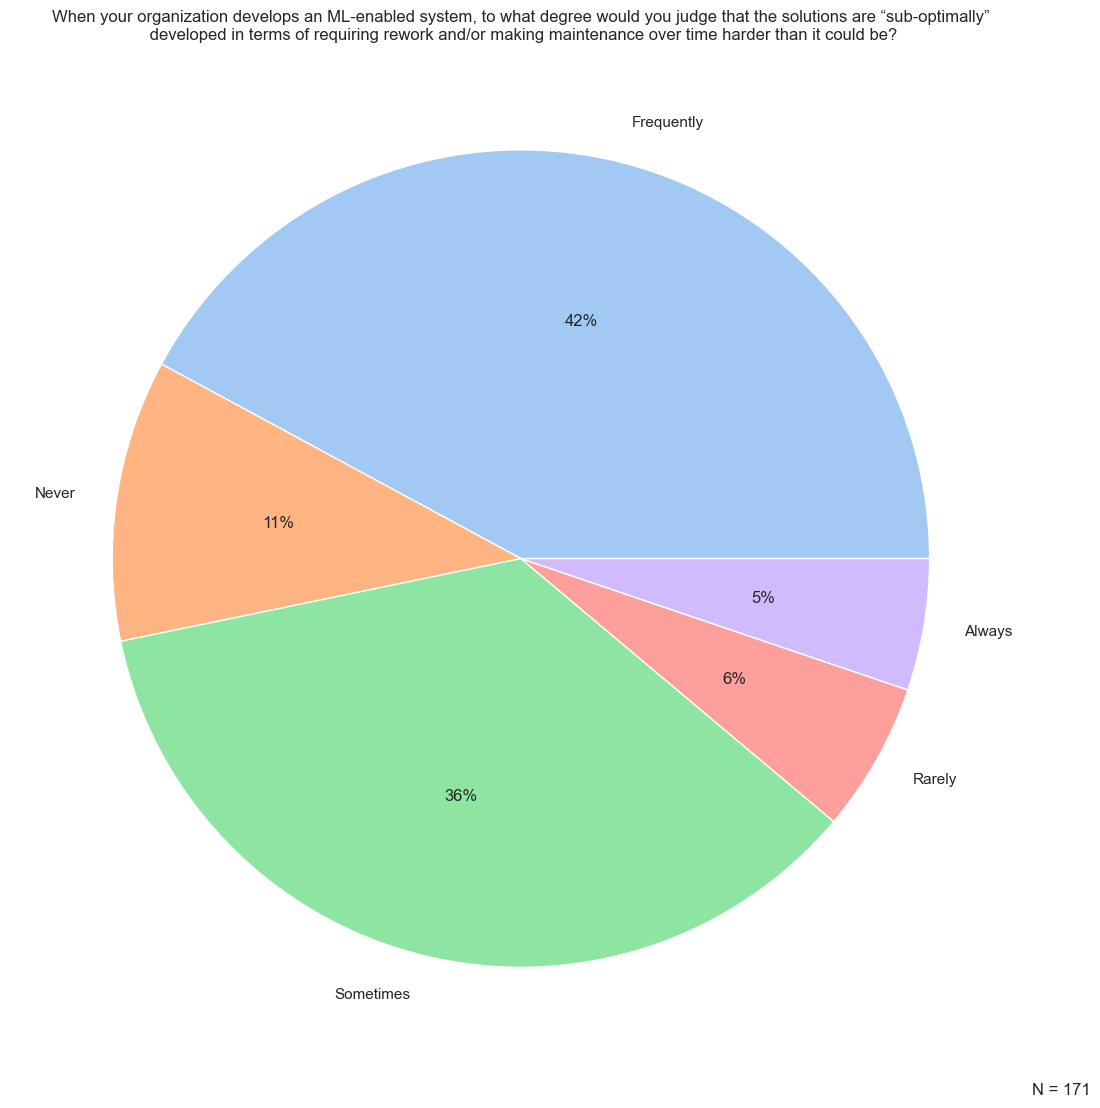

In [18]:
# pie chart
q6_plot = PlotUtils(pd.DataFrame(
    data={'Optimality': labels, 'Answers': values}
))

# compute total of answer considered in this question
total_answers = "N = " + str(len(dataframe_obj.df['Q6_ML_Solution_Optimality']))

q6_plot.pie_chart(values_column="Answers", labels_column="Optimality", 
                  title="When your organization develops an ML-enabled system, to what degree would you judge that the solutions are “sub-optimally”\n developed in terms of requiring rework and/or making maintenance over time harder than it could be?",
                  total_answers=total_answers)

In [19]:
# logical order to likert plot
order = [4, 0, 2, 3, 1]
labels = [labels[i] for i in order]
values = [100 * values[i] for i in order]

In [20]:
# likert data
population_agile_development = []
for label, value in zip(labels, values):
    population_agile_development += [label for _ in range(round(value * 100))]

In [21]:
# liker plot
q6_plot = PlotUtils(pd.DataFrame(
    data={'Optimality': population_agile_development}
))

In [22]:
q6_plot.likert(labels, use_percentage=True, bar_label=True)

TypeError: DataFrame.set_axis() got an unexpected keyword argument 'inplace'

In [23]:
q6_plot.likert(labels, use_percentage=False, bar_label=True)

TypeError: DataFrame.set_axis() got an unexpected keyword argument 'inplace'

In [24]:
# confidence for each option
print("Option : (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))

print(20*"---")

Option : (Lower Value, Mean, Upper Value)
Frequently:(0.4187528467729945, 0.42105263157894746, 0.4233524163849004)
Never:(0.10980180152059309, 0.11140350877192985, 0.11300521602326662)
Sometimes:(0.35416487966250915, 0.3562865497076023, 0.3584082197526955)
Rarely:(0.05791393055025519, 0.05916374269005849, 0.060413554829861785)
Always:(0.05104640222851656, 0.052093567251462, 0.05314073227440744)
------------------------------------------------------------


In [25]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':: P = ' + str(round((bootstrapped_dict_data[idx]['confidence'][1] * 100), 3)) + " [" + str(round((bootstrapped_dict_data[idx]['confidence'][0] * 100), 3)) + ", " + str(round((bootstrapped_dict_data[idx]['confidence'][2] * 100), 3)) + "]")

Option: (Lower Value, Mean, Upper Value)
Frequently:: P = 42.105 [41.875, 42.335]
Never:: P = 11.14 [10.98, 11.301]
Sometimes:: P = 35.629 [35.416, 35.841]
Rarely:: P = 5.916 [5.791, 6.041]
Always:: P = 5.209 [5.105, 5.314]
